In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=pd.read_excel('Desktop\\fake news detection\\Data_Train flight.xlsx')
data_t=pd.read_excel('Desktop\\fake news detection\\Test_set flight.xlsx')
data_s=pd.read_excel('Desktop\\fake news detection\\Sample_submission  flight.xlsx')

In [3]:
data_s=pd.read_excel('Desktop\\fake news detection\\Sample_submission  flight.xlsx')

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data_t.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [7]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
import seaborn as sns

AxesSubplot(0.125,0.125;0.775x0.755)


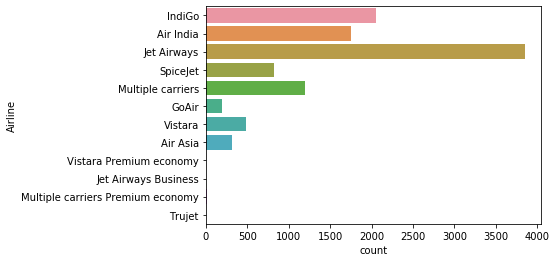

In [10]:
print(sns.countplot(y='Airline',data=data))
#plt.xticks(rotation=90)

AxesSubplot(0.125,0.125;0.775x0.755)


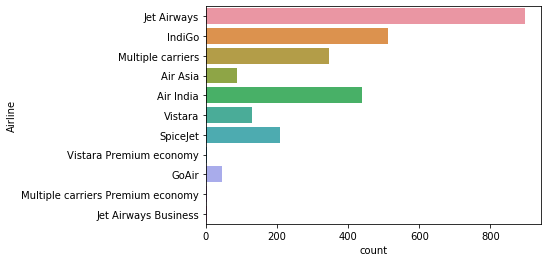

In [11]:
print(sns.countplot(y='Airline',data=data_t))

In [12]:
data['Airline'].replace('Jet Airways Business','Jet Airways',inplace=True)
data[data['Airline']=='Multiple carriers Premium economy']['Additional_Info'].replace('No info','other',inplace=True)
data[data['Airline']=='Vistara Premium economy']['Additional_Info'].replace('No info','other',inplace=True) 
data['Airline'].replace({'Multiple carriers Premium economy':'Multiple carriers','Vistara Premium economy':'Vistara','Trujet':'SpiceJet'},inplace=True)

E:\jupyter\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
data_t['Airline'].replace('Jet Airways Business','Jet Airways',inplace=True)
data_t[data_t['Airline']=='Multiple carriers Premium economy']['Additional_Info'].replace('No info','other',inplace=True)
data_t[data_t['Airline']=='Vistara Premium economy']['Additional_Info'].replace('No info','other',inplace=True) 
data_t['Airline'].replace({'Multiple carriers Premium economy':'Multiple carriers','Vistara Premium economy':'Vistara','Trujet':'SpiceJet'},inplace=True)

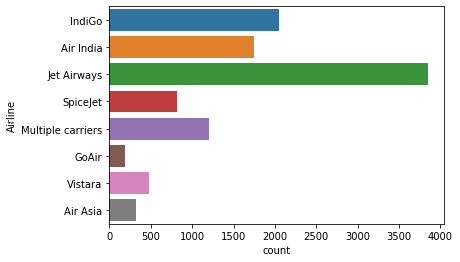

In [14]:
sns.countplot(y='Airline',data=data)

AxesSubplot(0.125,0.125;0.775x0.755)


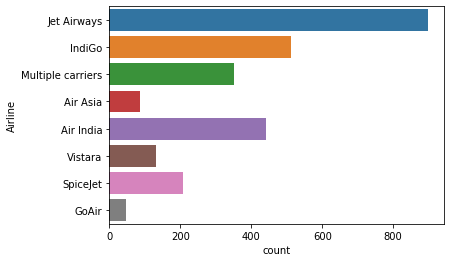

In [15]:
print(sns.countplot(y='Airline',data=data_t))
#plt.xticks(rotation=90)

In [16]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'],errors='coerce')
data['Dep_Time']=pd.to_datetime(data['Dep_Time'],format='%H:%M')

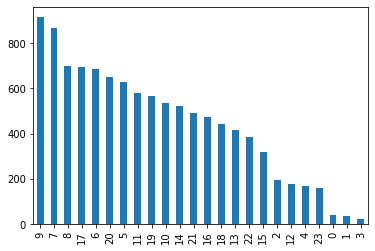

In [17]:
data['Dep_Time'].dt.hour.value_counts().plot(kind='bar')

In [18]:
data_t['Date_of_Journey']=pd.to_datetime(data_t['Date_of_Journey'],errors='coerce')
data_t['Dep_Time']=pd.to_datetime(data_t['Dep_Time'],format='%H:%M')

In [19]:
data['Dep_ti_h']=data['Dep_Time'].dt.hour
data['Dep_ti_m']=data['Dep_Time'].dt.minute
#data['Dep_ti']=pd.cut(data['Dep_ti'],[0,6,12,18,24],labels=['morning','afternoon','evening','night'])
data_t['Dep_ti_h']=data_t['Dep_Time'].dt.hour
data_t['Dep_ti_m']=data_t['Dep_Time'].dt.minute

In [20]:
#data.groupby(data['Dep_ti'])['Price'].median().plot(kind='bar')

In [21]:
data['arrival_time']=data['Arrival_Time'].str.split(" ").str[0]
data['arrival_time']=pd.to_datetime(data['arrival_time'],format='%H:%M')
data['arr_ti_h']=data['arrival_time'].dt.hour
data['arr_ti_m']=data['arrival_time'].dt.minute
#data['Dep_ti']=pd.cut(data['Dep_ti'],[0,6,12,18,24],labels=['morning','afternoon','evening','night'])
data_t['arrival_time']=data_t['Arrival_Time'].str.split(" ").str[0]
data_t['arrival_time']=pd.to_datetime(data_t['arrival_time'],format='%H:%M')
data_t['arr_ti_h']=data_t['arrival_time'].dt.hour
data_t['arr_ti_m']=data_t['arrival_time'].dt.minute
#data['arrival date']=data['Arrival_Time'].str.split(" ").str[1]

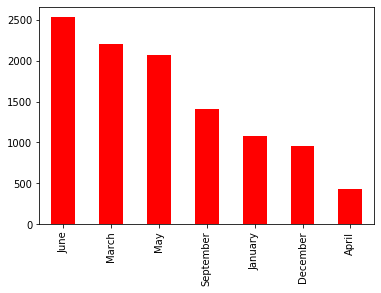

In [22]:
data['month']=pd.to_datetime(data['Date_of_Journey'],errors='coerce').dt.month_name()
pd.to_datetime(data['Date_of_Journey'],errors='coerce').dt.month_name().value_counts().plot(kind='bar',color='r')

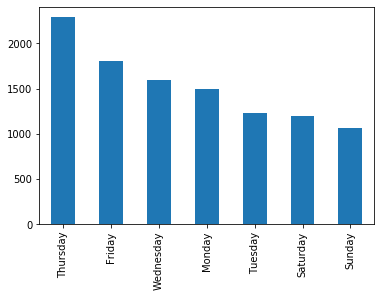

In [23]:
data['day']=pd.to_datetime(data['Date_of_Journey'],errors='coerce').dt.day_name()
pd.to_datetime(data['Date_of_Journey'],errors='coerce').dt.day_name().value_counts().plot(kind='bar')

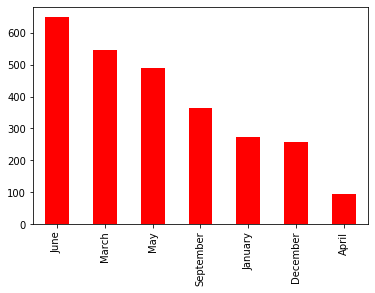

In [24]:
data_t['month']=pd.to_datetime(data_t['Date_of_Journey'],errors='coerce').dt.month_name()
data_t['day']=pd.to_datetime(data_t['Date_of_Journey'],errors='coerce').dt.day_name()
pd.to_datetime(data_t['Date_of_Journey'],errors='coerce').dt.month_name().value_counts().plot(kind='bar',color='r')

AxesSubplot(0.125,0.125;0.775x0.755)


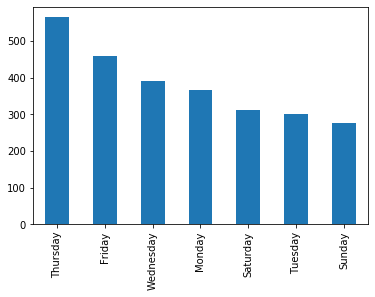

In [25]:
print(pd.to_datetime(data_t['Date_of_Journey'],errors='coerce').dt.day_name().value_counts().plot(kind='bar'))

In [26]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)
data_t['Destination'].replace('New Delhi','Delhi',inplace=True)

In [27]:
dur=list(data['Duration'])
for i in range(len(dur)):
    if len(dur[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"   # Adds 0 minute
        else:
            dur[i] = "0h " + dur[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(dur)):
    duration_hours.append(int(dur[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [28]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [29]:
dur=list(data_t['Duration'])
for i in range(len(dur)):
    if len(dur[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"   # Adds 0 minute
        else:
            dur[i] = "0h " + dur[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(dur)):
    duration_hours.append(int(dur[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
data_t["Duration_hours"] = duration_hours
data_t["Duration_mins"] = duration_mins    

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

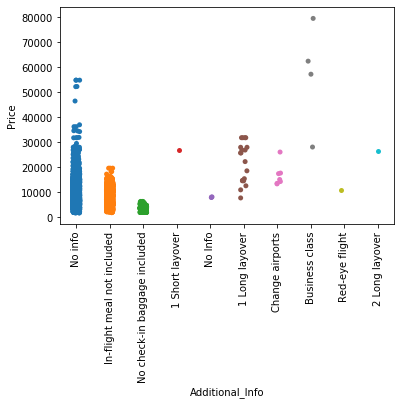

In [30]:
sns.stripplot(x='Additional_Info',y='Price',data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

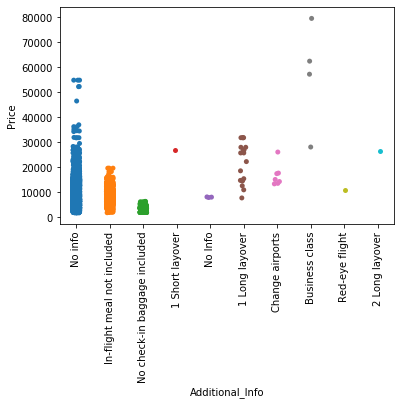

In [31]:
sns.stripplot(x='Additional_Info',y='Price',data=data)
plt.xticks(rotation=90)

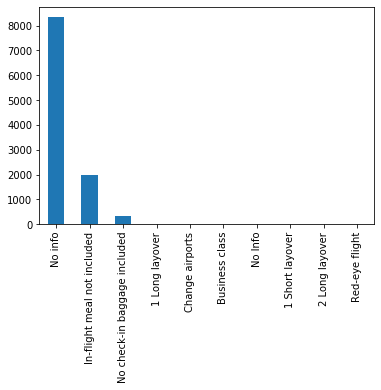

In [32]:
data['Additional_Info'].value_counts().plot(kind='bar')

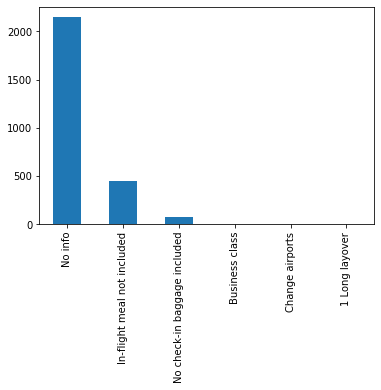

In [33]:
data_t['Additional_Info'].value_counts().plot(kind='bar')

In [34]:
data['Additional_Info'].replace(to_replace={'1 Long layover':'other','1 Short layover':'other','2 Long layover':'other','Business class':'other','Change airports':'other','Red-eye flight':'other'},inplace=True)
data_t['Additional_Info'].replace(to_replace={'1 Long layover':'other','1 Short layover':'other','2 Long layover':'other','Business class':'other','Change airports':'other','Red-eye flight':'other'},inplace=True)
data['Additional_Info'].replace('No Info','No info',inplace=True)
data_t['Additional_Info'].replace('No Info','No info',inplace=True)

In [35]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_ti_h,Dep_ti_m,arrival_time,arr_ti_h,arr_ti_m,month,day,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,1900-01-01 01:10:00,1,10,March,Sunday,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,5,50,1900-01-01 13:15:00,13,15,January,Saturday,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,9,25,1900-01-01 04:25:00,4,25,September,Friday,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1 stop,No info,6218,18,5,1900-01-01 23:30:00,23,30,December,Thursday,5,25
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1 stop,No info,13302,16,50,1900-01-01 21:35:00,21,35,January,Thursday,4,45


In [36]:
data.dropna(inplace=True)
data_t.dropna(inplace=True)

In [37]:
data['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4},inplace=True)

In [38]:
data_t['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4},inplace=True)
data_t['Total_Stops']=data_t['Total_Stops'].astype(int)

In [39]:
df_tr=pd.DataFrame(data=data,columns=['Airline','Source','Destination','Additional_Info','day','month'])
df_te=pd.DataFrame(data=data_t,columns=['Airline','Source','Destination','Additional_Info','day','month'])

In [40]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler

In [41]:
le=LabelEncoder()

In [42]:
df_trn=pd.DataFrame(data=data,columns=['Total_Stops','Duration_hours','Duration_mins','Dep_ti_h','Dep_ti_m','arr_ti_h','arr_ti_m'])
df_tes=pd.DataFrame(data=data_t,columns=['Total_Stops','Duration_hours','Duration_mins','Dep_ti_h','Dep_ti_m','arr_ti_h','arr_ti_m'])

In [43]:
df_trn['check']=0

In [44]:
df_tr=df_tr.append(df_te,ignore_index=True)

In [45]:
df_tes['check']=1
df_trn=df_trn.append(df_tes,ignore_index=True)

In [46]:
y=data['Price']

In [47]:
df_tr=df_tr.apply(le.fit_transform)
#df_te=df_te.apply(le.fit_transform)

In [48]:
x=df_tr.merge(df_trn,right_index=True,left_index=True)
#xx=df_te.merge(df_tes,right_index=True,left_index=True)

In [49]:
df_trn.shape

(13353, 8)

In [50]:
df_tes.shape

(2671, 8)

In [51]:
dfs=OneHotEncoder(sparse=True).fit_transform(x)
#dfss=OneHotEncoder(sparse=True).fit_transform(xx)

E:\jupyter\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [52]:
x.head()

,Airline,Source,Destination,Additional_Info,day,month,Total_Stops,Duration_hours,Duration_mins,Dep_ti_h,Dep_ti_m,arr_ti_h,arr_ti_m,check
0,3,0,2,2,3,4,0,2,50,22,20,1,10,0
1,1,3,0,2,2,2,2,7,25,5,50,13,15,0
2,4,2,1,2,0,6,2,19,0,9,25,4,25,0
3,3,3,0,2,4,1,1,5,25,18,5,23,30,0
4,3,0,2,2,4,2,1,4,45,16,50,21,35,0


In [53]:
x.shape

(13353, 14)

In [54]:
y.shape

(10682,)

In [55]:
scaler=StandardScaler()
sca=RobustScaler(quantile_range=(10,90))
#df1=sca.fit_transform(x)
#df2=sca.fit_transform(xx)

In [56]:
df1=x[x['check']==0]
df2=x[x['check']==1]

In [83]:
df1.drop(columns='check',inplace=True)
df2.drop(columns='check',inplace=True)

KeyError: "['check'] not found in axis"

In [80]:
df2.reset_index(inplace=True)

In [84]:
df2.drop(columns='index',inplace=True)

E:\jupyter\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [98]:
df1=np.array(df1)
df2=np.array(df2)

In [57]:
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [99]:
#train_X, test_X, train_y, test_y = train_test_split(df1, y, test_size = 0.3, random_state = 123) 
train_X, test_X, train_y, test_y=df1,df2,y,data_s['Price']
# Instantiation 
xgb_r = xg.XGBRegressor(colsample_bytree=0.5, gamma=5, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2300,
                             reg_alpha=0.5, reg_lambda=0.9,
                             subsample=0.5, silent=1,
                             random_state =42, nthread = -1) 
  
# Fitting the model 
xgb_r.fit(train_X, train_y) 
  
# Predict the model 
pred = xgb_r.predict(test_X) 
# RMSE Computation 
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

E:\jupyter\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
E:\jupyter\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


RMSE :  12784.117216


In [157]:
df1[1]

array([ 1,  3,  0,  2,  2,  2,  2,  7, 25,  5, 50, 13, 15], dtype=int64)

In [153]:
df2[5]

array([ 4,  2,  1,  0,  0,  1,  1, 18, 20, 18, 15, 12, 35], dtype=int64)

In [103]:
xgb_r.score(train_X,train_y)

0.8719573768840796

In [89]:
#from sklearn.ensemble import GradientBoostingRegressor 
#X_train, X_test, y_train, y_test = train_test_split(df1, y,random_state=42, test_size=0.3)
#rf = GradientBoostingRegressor()
#rf.fit(X_train, y_train)
#y_pred = rf.predict(X_test)
#rmse = np.sqrt(MSE(y_test, y_pred))
#print("RMSE : % f" %(rmse))

In [104]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(df1, y,random_state=42, test_size=0.3)
#X_train, X_test, y_train, y_test = df1,df2,y,data_s['Price']
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

E:\jupyter\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE :  2113.393249


In [105]:
rf.score(X_train,y_train)

0.9593494764169876

In [159]:
from sklearn.metrics import r2_score as r2
print(r2(test_y, pred))
print(r2(y_test,y_pred))

-5.525693478086382
0.7810672467369286


In [168]:
rf.predict([[ 4,  2,  1,  0,  0,  1,  1, 18, 20, 18, 15, 12, 35] ])

array([10262.])

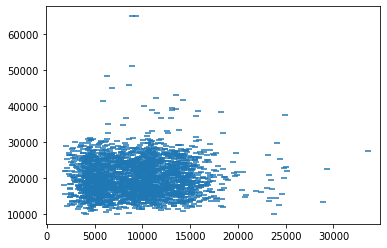

In [108]:
plt.scatter(pred,test_y,marker=True)

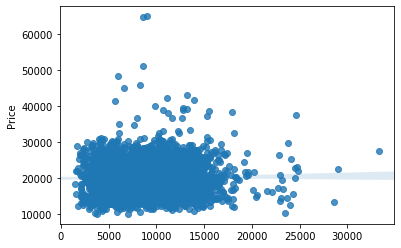

In [109]:
sns.regplot(pred,test_y)

In [110]:
y_pred

array([16347.9,  6458.5,  8704.1, ...,  5936.4,  3202.9,  7229.2])

In [111]:
y=data["Price"]

In [112]:
data['Price'].skew()

1.812404554693161

In [113]:
data['Price'].kurt()

13.3019367653792

In [169]:
import pickle
# open a file, where you ant to store the data
file4 = open('flight3.pkl', 'wb')
f4 = open('flight3.pkl', 'rb')
# dump information to that file
model=pickle.dump(rf,file4)

In [170]:
forest = pickle.load(f4)

In [172]:
forest.predict([[ 3,  3,  0,  2,  4,  1,  1,  4,  0,  6, 20, 10, 20]])

array([4208.3])

In [ ]:
ss=np.array(X_test)

In [ ]:
ss

In [173]:
model

In [174]:
f4

<_io.BufferedReader name='flight3.pkl'>

In [175]:
file4

<_io.BufferedWriter name='flight3.pkl'>